In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset1: Data from 28th October 2017 to 12th December 2023

In [2]:
# Convert Date column to datetime format

data1 = pd.read_csv('../Data/mana-usd-max.csv')
data1['snapped_at'] = data1['snapped_at'].apply(lambda x: x[:10])
data1['snapped_at'] = pd.to_datetime(data1['snapped_at'])
data1

,snapped_at,price,market_cap,total_volume
0,2017-10-28,0.010094,2.295129e+07,2.421181e+05
1,2017-10-29,0.010124,2.301864e+07,2.958165e+05
2,2017-10-30,0.009775,2.222603e+07,2.659636e+05
3,2017-10-31,0.009237,2.100224e+07,2.751197e+05
4,2017-11-01,0.010004,2.274761e+07,4.555642e+05
...,...,...,...,...
2231,2023-12-09,0.522415,9.643376e+08,1.402312e+08
2232,2023-12-10,0.535155,9.865616e+08,1.769037e+08
2233,2023-12-11,0.531222,9.797049e+08,2.128635e+08
2234,2023-12-12,0.489519,9.048443e+08,2.556350e+08


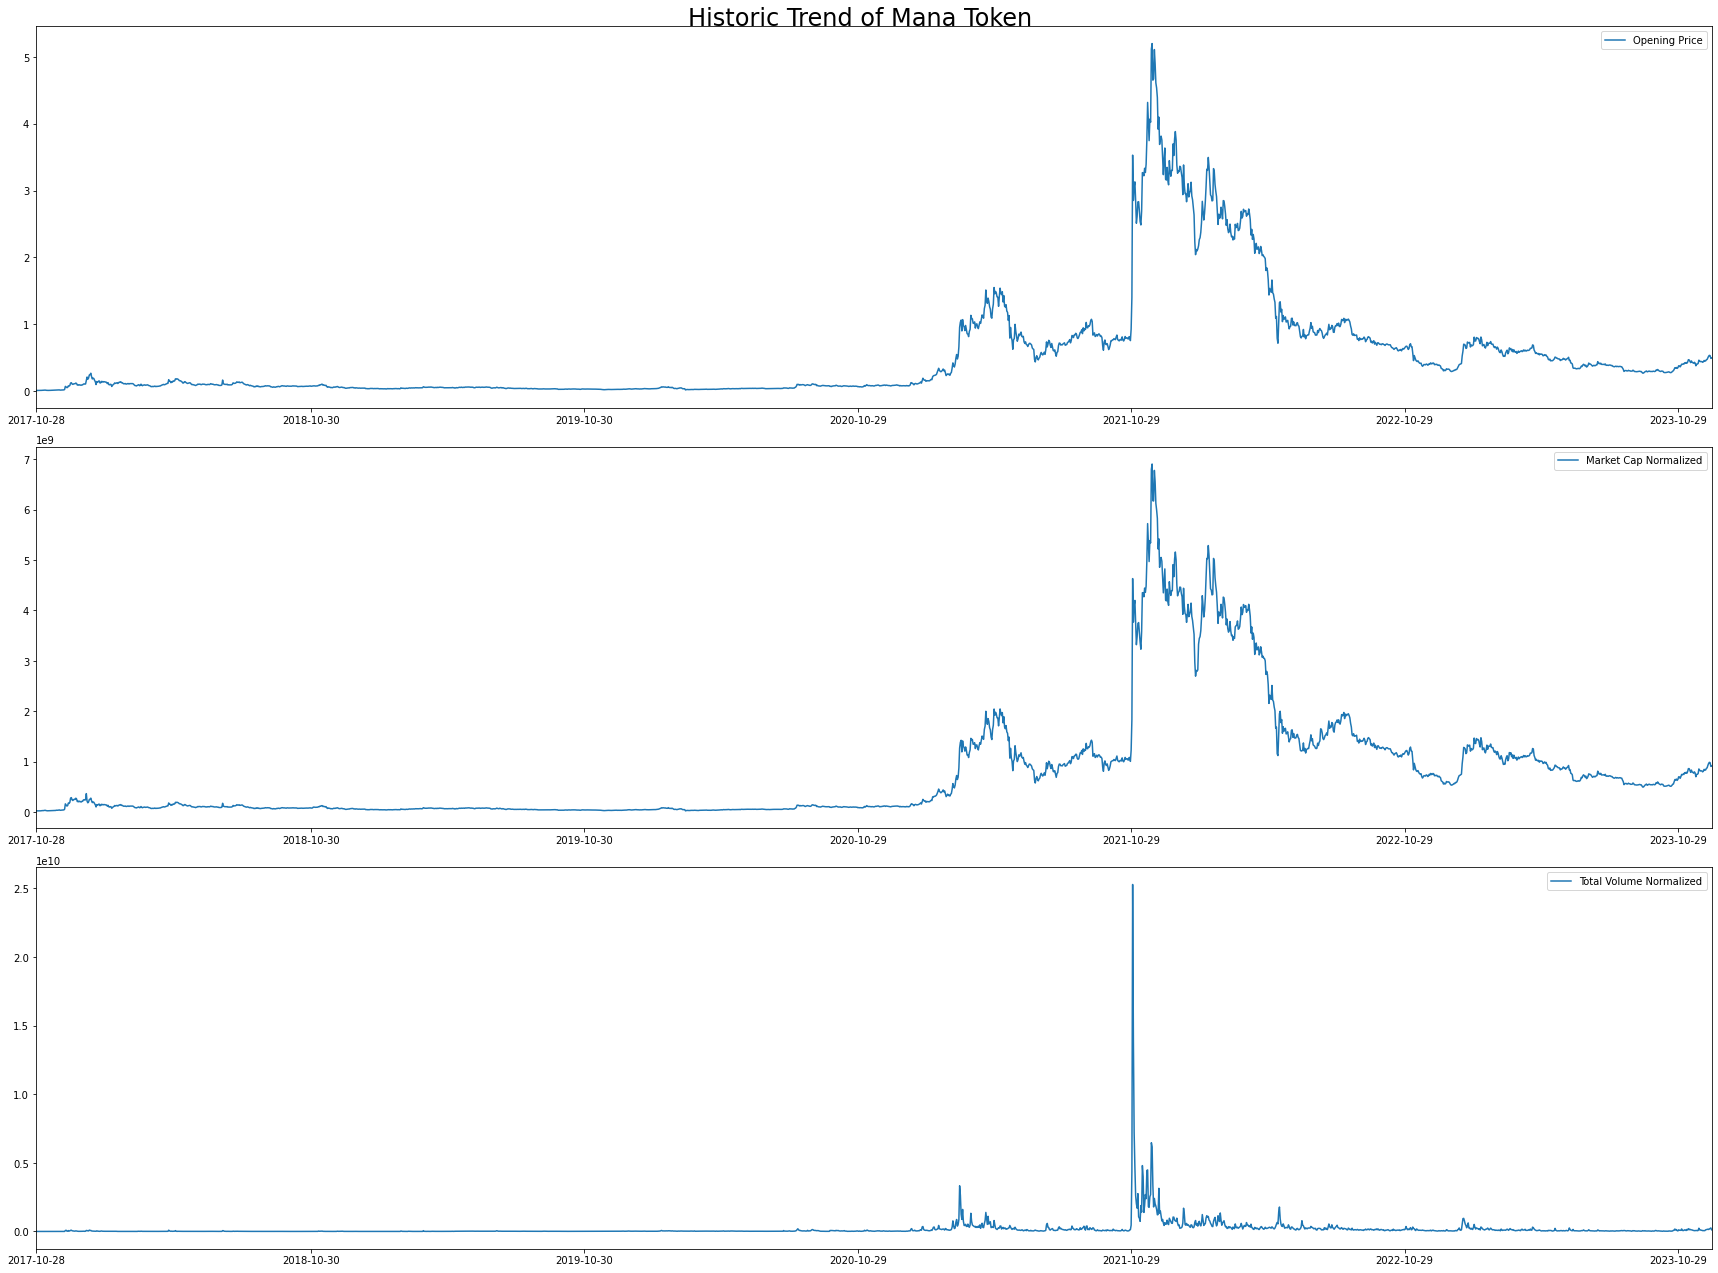

In [38]:
fig, axs = plt.subplots(3,figsize=(24,18))
plt.suptitle('Historic Trend of Mana Token', fontsize=24)
axs[0].plot(data1.snapped_at, data1.price, label='Opening Price')
axs[0].set_xticks(data1.snapped_at[::365])
axs[0].legend()
axs[0].set(xlim=(data1.snapped_at.min(), data1.snapped_at.max()))
data1['market_cap_norm'] = data1['market_cap']/data1['market_cap'].max()
data1['total_volume_norm'] = data1['total_volume']/data1['total_volume'].max()
axs[1].plot(data1.snapped_at, data1.market_cap, label='Market Cap Normalized')
axs[1].set_xticks(data1.snapped_at[::365])
axs[1].legend()
axs[1].set(xlim=(data1.snapped_at.min(), data1.snapped_at.max()))
# for total volume
axs[2].plot(data1.snapped_at, data1.total_volume, label='Total Volume Normalized')
axs[2].set_xticks(data1.snapped_at[::365])
axs[2].legend()
axs[2].set(xlim=(data1.snapped_at.min(), data1.snapped_at.max()))
plt.tight_layout()
plt.show()
fig.savefig('../Images/mana_historic_price.png')

# Dataset2: Last 3 years daily data from 3rd January 2021  to 12th December 2023 with more information

In [4]:
data2 = pd.read_csv('../Data/Decentraland_Daily.csv',sep=';')
data2.head()

,timeOpen,timeClose,timeHigh,timeLow,name,open,high,low,close,volume,marketCap,timestamp
0,2023-12-12T00:00:00.000Z,2023-12-12T23:59:59.999Z,2023-12-12T07:57:00.000Z,2023-12-12T18:01:00.000Z,2781,0.489626,0.497233,0.480001,0.494660,1.135043e+08,9.364393e+08,2023-12-12T23:59:59.999Z
1,2023-12-11T00:00:00.000Z,2023-12-11T23:59:59.999Z,2023-12-11T00:01:00.000Z,2023-12-11T18:32:00.000Z,2781,0.531778,0.533289,0.473432,0.489626,2.499998e+08,9.269085e+08,2023-12-11T23:59:59.999Z
2,2023-12-10T00:00:00.000Z,2023-12-10T23:59:59.999Z,2023-12-10T08:31:00.000Z,2023-12-10T17:46:00.000Z,2781,0.534715,0.572858,0.524943,0.531625,2.393735e+08,1.006417e+09,2023-12-10T23:59:59.999Z
3,2023-12-09T00:00:00.000Z,2023-12-09T23:59:59.999Z,2023-12-09T09:34:00.000Z,2023-12-09T00:02:00.000Z,2781,0.520931,0.550155,0.520575,0.534803,1.782173e+08,1.012432e+09,2023-12-09T23:59:59.999Z
4,2023-12-08T00:00:00.000Z,2023-12-08T23:59:59.999Z,2023-12-08T22:04:00.000Z,2023-12-08T07:35:00.000Z,2781,0.502031,0.522659,0.487127,0.520963,1.373996e+08,9.862329e+08,2023-12-08T23:59:59.999Z


## Data preparation

In [5]:
# clean data
data2['Date'] = data2['timestamp'].apply(lambda x: x[:10])
data2.drop(['name'], axis=1, inplace=True)
data2.drop(['timestamp'], axis=1, inplace=True)
data2['timeClose']=pd.to_datetime(data2['timeClose'])
data2['timeOpen']=pd.to_datetime(data2['timeOpen'])
data2['timeHigh']=pd.to_datetime(data2['timeHigh'])
data2['timeLow']=pd.to_datetime(data2['timeLow'])
data2['timeClose'] = data2['timeClose'].dt.time
data2['timeOpen'] = data2['timeOpen'].dt.time
data2['timeHigh'] = data2['timeHigh'].dt.time
data2['timeLow'] = data2['timeLow'].dt.time
data2['Date'] = pd.to_datetime(data2['Date'])
data2.head()

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,Date
0,00:00:00,23:59:59.999000,07:57:00,18:01:00,0.489626,0.497233,0.480001,0.494660,1.135043e+08,9.364393e+08,2023-12-12
1,00:00:00,23:59:59.999000,00:01:00,18:32:00,0.531778,0.533289,0.473432,0.489626,2.499998e+08,9.269085e+08,2023-12-11
2,00:00:00,23:59:59.999000,08:31:00,17:46:00,0.534715,0.572858,0.524943,0.531625,2.393735e+08,1.006417e+09,2023-12-10
3,00:00:00,23:59:59.999000,09:34:00,00:02:00,0.520931,0.550155,0.520575,0.534803,1.782173e+08,1.012432e+09,2023-12-09
4,00:00:00,23:59:59.999000,22:04:00,07:35:00,0.502031,0.522659,0.487127,0.520963,1.373996e+08,9.862329e+08,2023-12-08


Getting the Range and difference for all days

In [6]:

data2['range'] = data2.high - data2.low
data2['difference'] = data2.close - data2.open

# Analysing the coorelation between the features

In [46]:
def get_corelation_map(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 9))
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    fig = sns.heatmap(
        corr, 
        cmap=colormap,
        square=True, 
        annot=True, 
        annot_kws={'fontsize':10 }
    )
    return fig


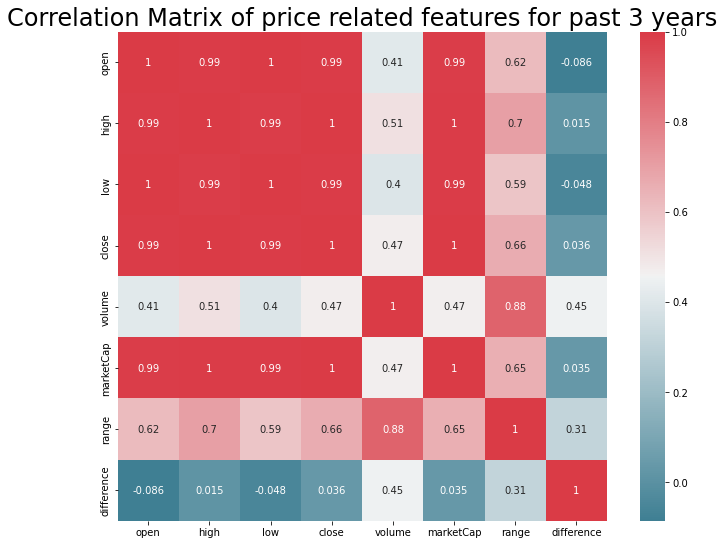

In [50]:
data2copy = data2.drop(['timeClose','timeOpen','timeHigh','timeLow','Date'], axis=1)
fig = get_corelation_map(data2copy)
# add title
fig.set_title('Correlation Matrix of price related features for past 3 years', fontsize=24)
fig.figure.savefig('../Images/mana_correlation_3_year.png')


# Comparision of Normalized price development through the years:

In [111]:

def comp_norm_price_dev(df, col, years, date_col, smooth=None):
    fig, axs = plt.subplots(figsize=(24,8))
    fig.suptitle('Yearly Normalized Price Development', fontsize=20)
    for year in years:
        relevant_rows = df[df[date_col].dt.year==year]
        norm_data = (relevant_rows[col] - relevant_rows[col].min()) / (relevant_rows[col].max() - relevant_rows[col].min())
        formatted_dates = [(d - dt.datetime(year=year, month=1, day=1)).days for d in relevant_rows[date_col]]
        # smooth the data before plotting
        if smooth:
            norm_data = pd.Series(norm_data).rolling(20).mean()
        axs.plot(formatted_dates, norm_data, label=year)
    axs.legend(ncol=len(years))
    axs.set(xlim=(0,365), xlabel='Day of the year', ylabel='Normalized Bitcoin Price')
    # show the x axis labels as the month names
    axs.set_xticks([0,31,59,90,120,151,181,212,243,273,304,334])
    axs.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
    plt.tight_layout()
    plt.show()
    return fig


        


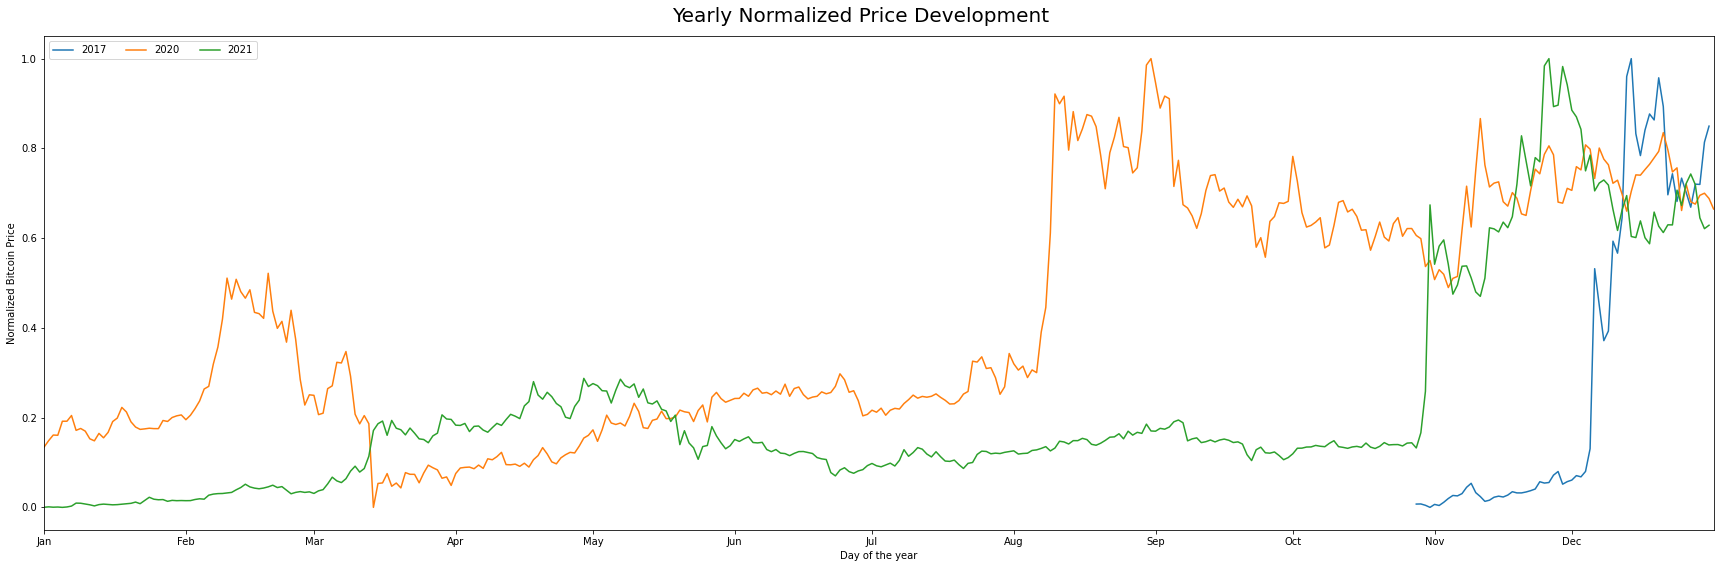

In [108]:
fig = comp_norm_price_dev(data1,col = 'price', years = [2017,2020,2021], date_col = 'snapped_at')
fig.figure.savefig('../Images/mana_norm_price_dev_20_21.png')

2022 is often called the Crypto Winter: https://www.investopedia.com/news/bitcoin-biggest-price-swings-happen-weekends/

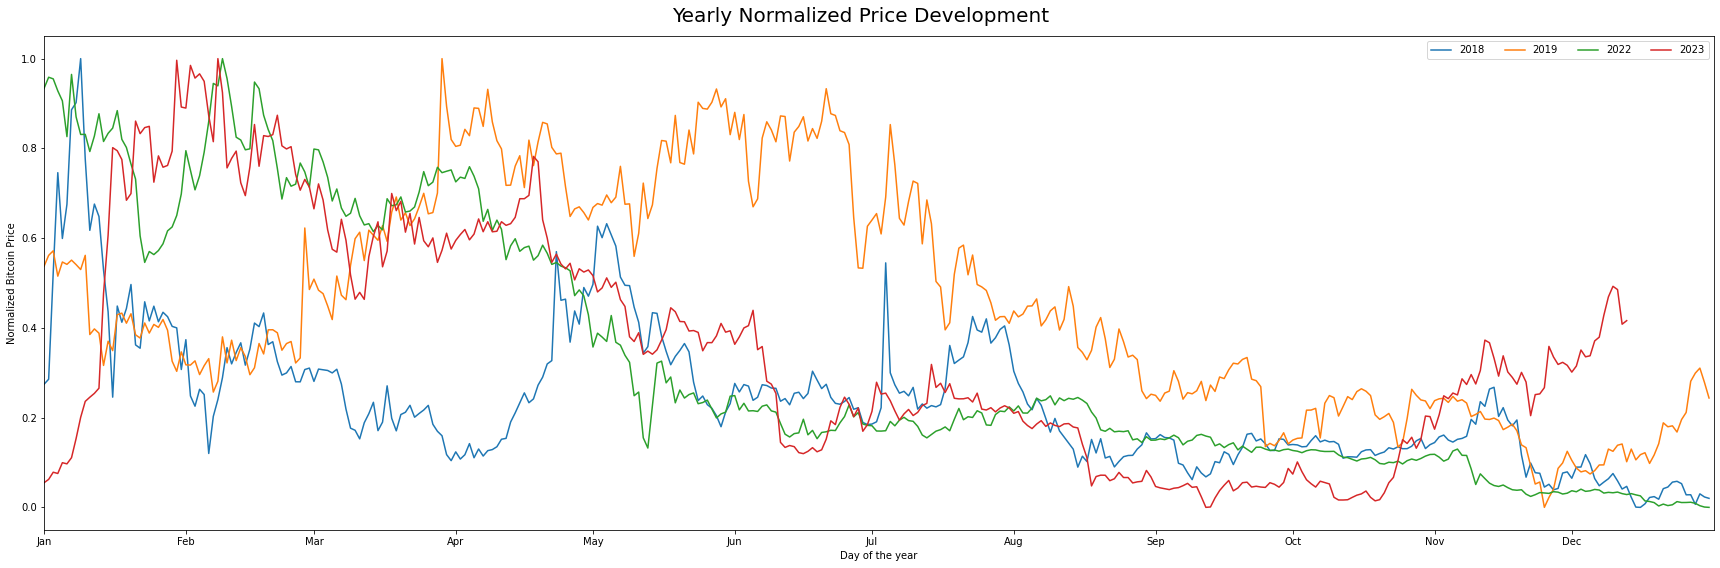

In [109]:
fig = comp_norm_price_dev(data1,col = 'price', years = [2018,2019,2022,2023], date_col = 'snapped_at')
fig.figure.savefig('../Images/mana_norm_price_dev_18_19_22_23.png')

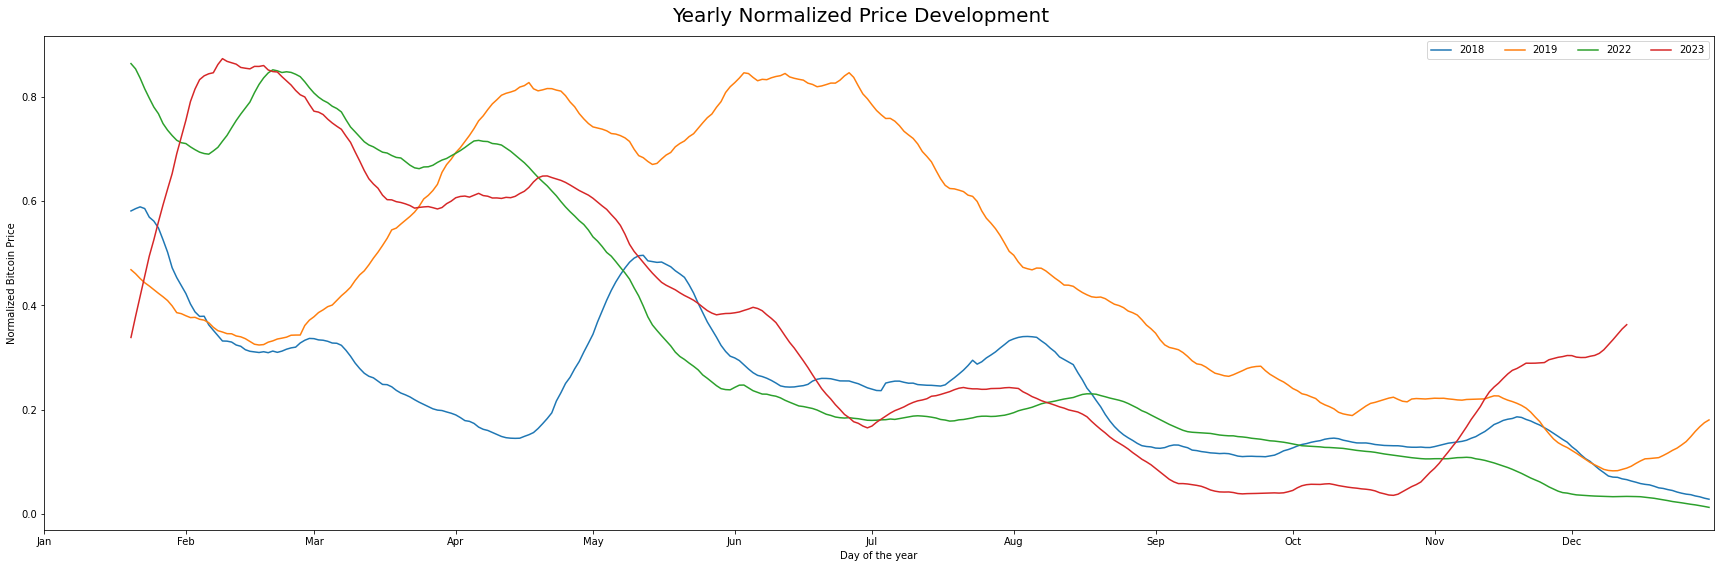

In [112]:
fig = comp_norm_price_dev(data1,col = 'price', years = [2018,2019,2022,2023], date_col = 'snapped_at', smooth=True)
fig.figure.savefig('../Images/mana_norm_price_dev_18_19_22_23_smooth.png')

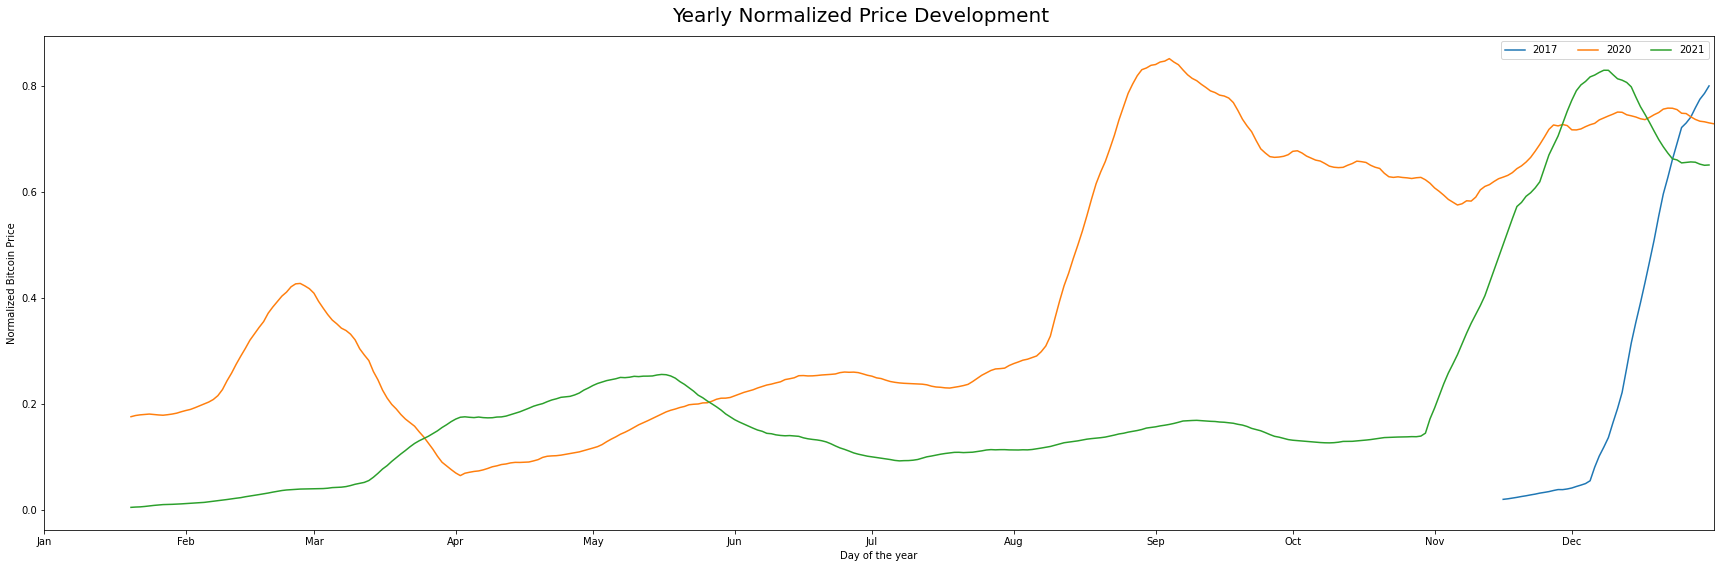

In [113]:
fig = comp_norm_price_dev(data1,col = 'price', years = [2017,2020,2021], date_col = 'snapped_at', smooth=True)
fig.figure.savefig('../Images/mana_norm_price_dev_20_21_smooth.png')

# Analysis of Weekly trend 

Done on Data 2

In [69]:
def weekly_trend(df,years):
    fig, axs = plt.subplots(1, figsize=(24,10))
    fig.suptitle('Mean range grouped by days of the week', fontsize=20)
    # Plot mean range by weekday
    # create a stack plot instead of a line plot using plt.stackplot
    y = []
    for year in years:
        relevant_rows = df[df['Date'].dt.year==year]
        relevant_rows.drop(['timeClose','timeOpen','timeHigh','timeLow'], axis=1, inplace=True)
        r = relevant_rows.groupby(relevant_rows['Date'].dt.weekday).mean()
        y.append(r['range'])
    
    axs.stackplot(range(7), y, labels=years)
    axs.legend(ncol=len(years))
    axs.set_xticklabels(['extra','Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    axs.set(xlabel='Day of the Week', ylabel='Mean Range')
    plt.tight_layout()
    plt.show()
    return fig

<ipython-input-69-a32e5c9636d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_rows.drop(['timeClose','timeOpen','timeHigh','timeLow'], axis=1, inplace=True)
<ipython-input-69-a32e5c9636d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_rows.drop(['timeClose','timeOpen','timeHigh','timeLow'], axis=1, inplace=True)
<ipython-input-69-a32e5c9636d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_rows.drop([

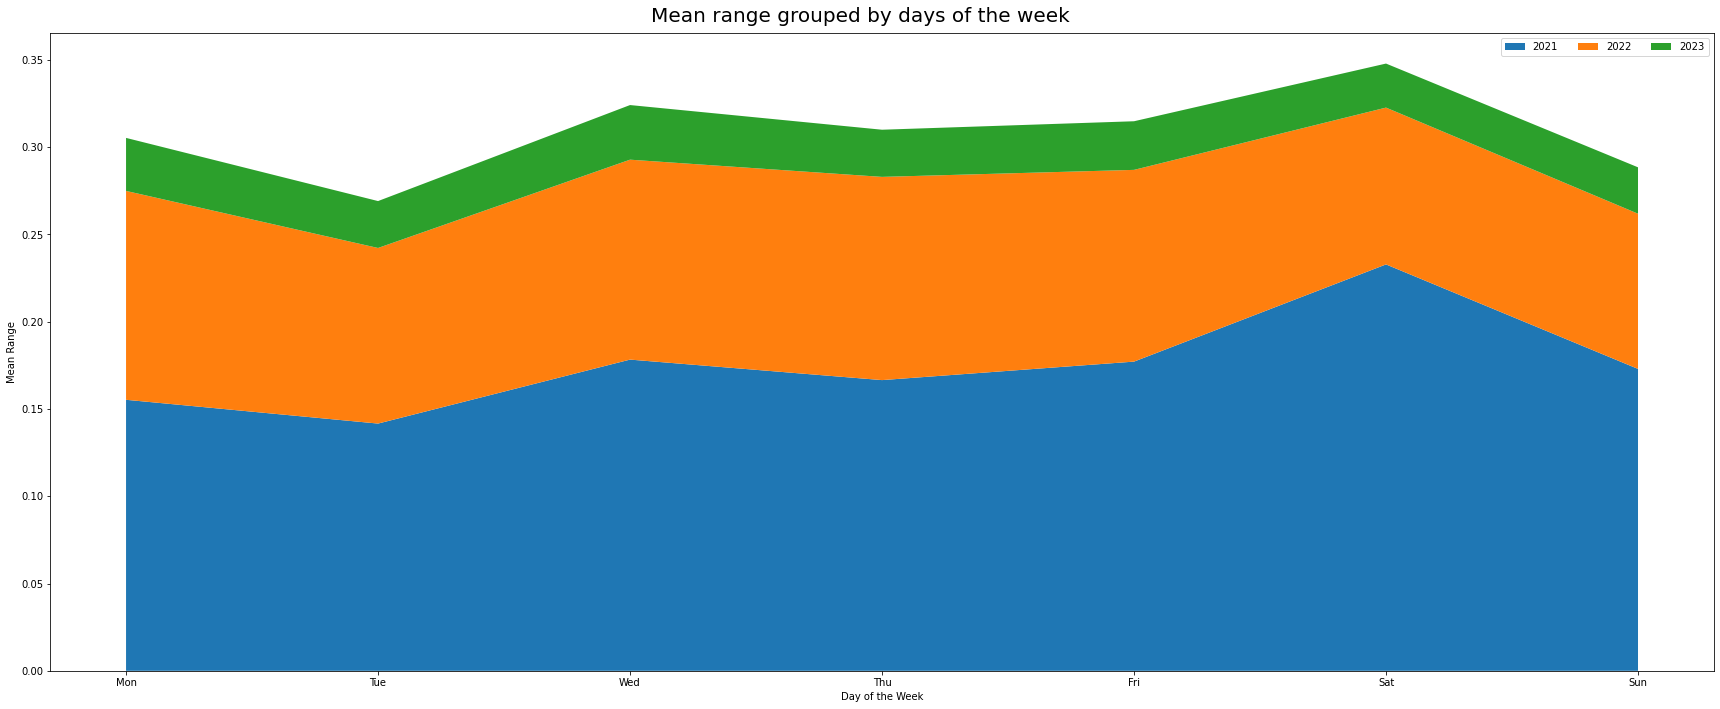

In [71]:
fig = weekly_trend(data2,years=[2021,2022,2023])
fig.figure.savefig('../Images/mana_weekly_trend_range_21_22_23.png')

# Extreme value analysis

In [165]:
# Print the top k dates with their days with highest and lowest differences

def top_k_dates(df,k,maxi,mini):
    lowest = df[['Date', 'difference']].sort_values(by='difference').head(k)
    highest = df[['Date', 'difference']].sort_values(by='difference', ascending=False).head(k)
    # data frame with the lowest differences with the date and the day of the week
    df_lowest = pd.DataFrame()
    df_lowest['Date'] = lowest['Date']
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_lowest['Day'] = [days[d] for d in lowest['Date'].dt.weekday]
    df_lowest['Difference'] = lowest['difference'].values
    # data frame with the highest differences with the date and the day of the week
    df_highest = pd.DataFrame()
    df_highest['Date'] = highest['Date']
    df_highest['Day'] = [days[d] for d in highest['Date'].dt.weekday]
    df_highest['Difference'] = highest['difference'].values
    # remove the indexing
    df_lowest.reset_index(drop=True, inplace=True)
    df_highest.reset_index(drop=True, inplace=True)
    # print them
    print('Dates with the lowest differences:')
    print(df_lowest)
    print('Dates with the highest differences:')
    print(df_highest)
    # prepare a color map to show these differences
    cmap = plt.cm.coolwarm
    norm = plt.Normalize(vmin=mini, vmax=maxi)
    # plot the differences
    fig, axs = plt.subplots(2, figsize=(24,12))
    fig.suptitle('Highest and Lowest Differences', fontsize=20)
    # plot the days vs the lowest differences for that day stacked on top of each other
    bottom = 0

    y = np.zeros((10,7))
    i = 0
    for row in df_lowest.iterrows():
        y[i][row[1]['Date'].weekday()] = row[1]['Difference']
        i += 1
    bottom = [0]*7
    for i in range(10):
        axs[0].bar(days, y[i], bottom=bottom, color=cmap(norm(y[i])))
        bottom += y[i]
    axs[0].set_title('Lowest Differences')
    axs[0].set(xlabel='Day of the Week', ylabel='Difference')

    y = np.zeros((10,7))
    i = 0
    for row in df_highest.iterrows():
        y[i][row[1]['Date'].weekday()] = row[1]['Difference']
        i += 1
    bottom = [0]*7
    for i in range(10):
        axs[1].bar(days, y[i], bottom=bottom, color=cmap(norm(y[i])))
        bottom += y[i]
    # axs[1].bar(df_highest['Day'], df_highest['Difference'], color=cmap(norm(df_highest['Difference'])))
    axs[1].set_title('Highest Differences')
    axs[1].set(xlabel='Day of the Week', ylabel='Difference')
    plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)
    plt.show()
    return fig




Dates with the lowest differences:
        Date        Day  Difference
0 2021-10-31     Sunday   -0.688834
1 2021-11-26     Friday   -0.559473
2 2021-12-03     Friday   -0.502561
3 2021-12-13     Monday   -0.462969
4 2022-01-21     Friday   -0.421680
5 2021-12-05     Sunday   -0.417027
6 2021-12-28    Tuesday   -0.394705
7 2021-11-21     Sunday   -0.361677
8 2021-11-04   Thursday   -0.352237
9 2021-05-19  Wednesday   -0.345854
Dates with the highest differences:
        Date       Day  Difference
0 2021-10-30  Saturday    2.169386
1 2021-11-12    Friday    0.621096
2 2021-11-19    Friday    0.541661
3 2022-02-15   Tuesday    0.474991
4 2021-10-29    Friday    0.473433
5 2022-01-06  Thursday    0.459913
6 2021-11-22    Monday    0.435720
7 2021-11-28    Sunday    0.401787
8 2021-11-18  Thursday    0.392339
9 2021-12-23  Thursday    0.386468


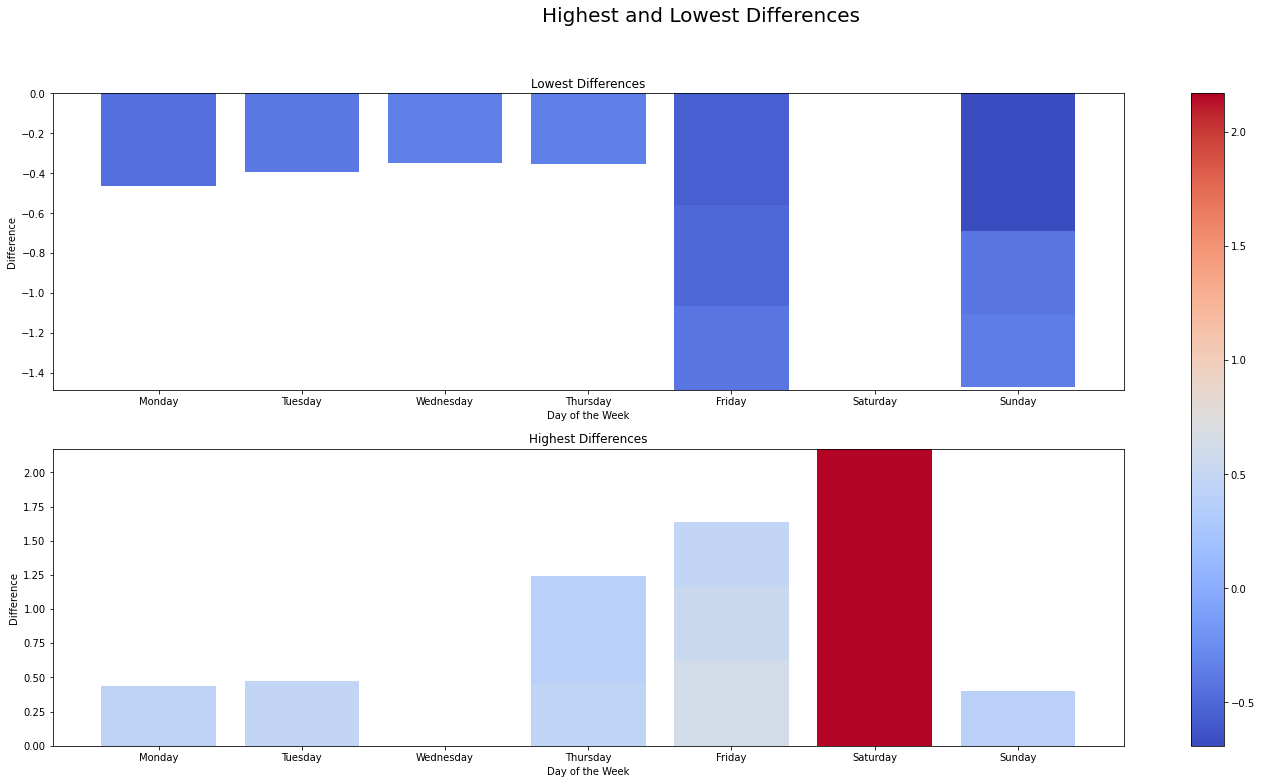

In [168]:
fig = top_k_dates(data2,10,2.17,-0.69)
# save with labels with the name of dataframe and k
fig.savefig('../Images/top_10_dates_3_year.png')

# Last year analysis

In [160]:
new_data = data2[data2['Date'].dt.year==2023]

Brands showcase metaverse in Auto Expo in Jan 2023 
https://www.livemint.com/technology/tech-news/brands-showcase-metaverse-platforms-at-auto-expo-2023-11673540662912.html

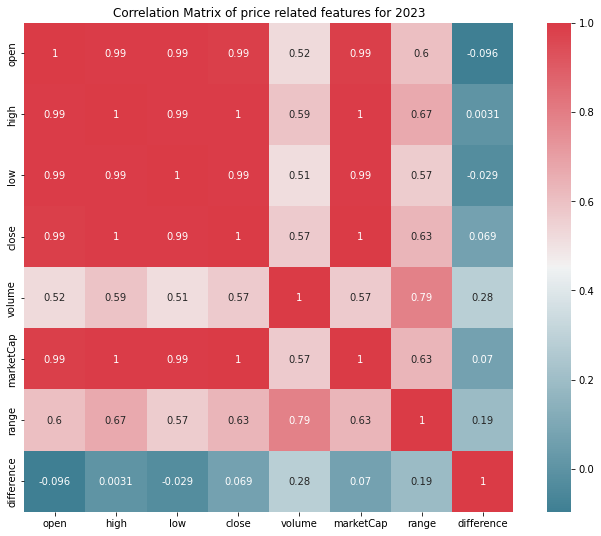

In [94]:
new_data2 = new_data.drop(['timeClose','timeOpen','timeHigh','timeLow','Date'], axis=1)
fig = get_corelation_map(new_data2)
# add title
fig.set_title('Correlation Matrix of price related features for 2023', fontsize=12)
fig.figure.savefig('../Images/mana_correlation_1_2023.png')

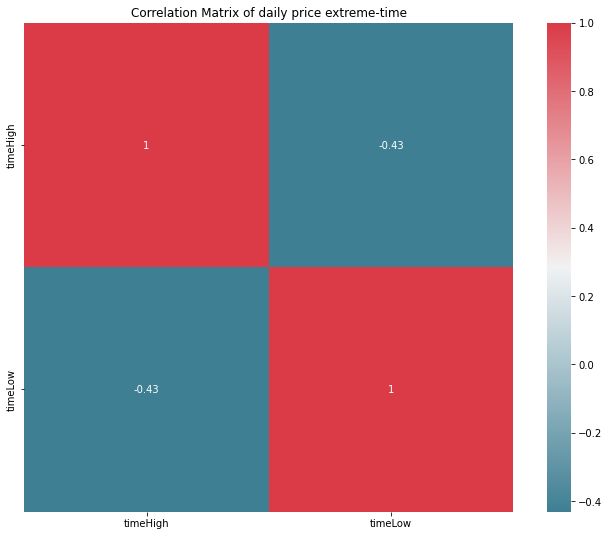

In [114]:
new_data3 = new_data.drop(['open','close','high','low','marketCap','volume','Date','range','difference','timeOpen','timeClose'], axis=1)
# convert time to a normalized value between 0 to 24
new_data3['timeHigh'] = new_data3['timeHigh'].apply(lambda x: x.hour + x.minute/60)
new_data3['timeLow'] = new_data3['timeLow'].apply(lambda x: x.hour + x.minute/60)
fig = get_corelation_map(new_data3)
# add title
fig.set_title('Correlation Matrix of daily price extreme-time', fontsize=12)
fig.figure.savefig('../Images/mana_correlation_time_2023.png')

Dates with the lowest differences:
        Date        Day  Difference
0 2023-02-09   Thursday   -0.088176
1 2023-04-19  Wednesday   -0.069244
2 2023-01-24    Tuesday   -0.063956
3 2023-06-10   Saturday   -0.059312
4 2023-01-30     Monday   -0.057805
5 2023-03-15  Wednesday   -0.054513
6 2023-02-16   Thursday   -0.052044
7 2023-01-18  Wednesday   -0.050476
8 2023-06-05     Monday   -0.046777
9 2023-02-05     Sunday   -0.043763
Dates with the highest differences:
        Date        Day  Difference
0 2023-01-13     Friday    0.117040
1 2023-01-29     Sunday    0.111544
2 2023-01-15     Sunday    0.106142
3 2023-02-07    Tuesday    0.097532
4 2023-01-20     Friday    0.086891
5 2023-03-17     Friday    0.070753
6 2023-01-14   Saturday    0.066115
7 2023-02-15  Wednesday    0.054454
8 2023-02-01  Wednesday    0.051362
9 2023-11-25   Saturday    0.049875


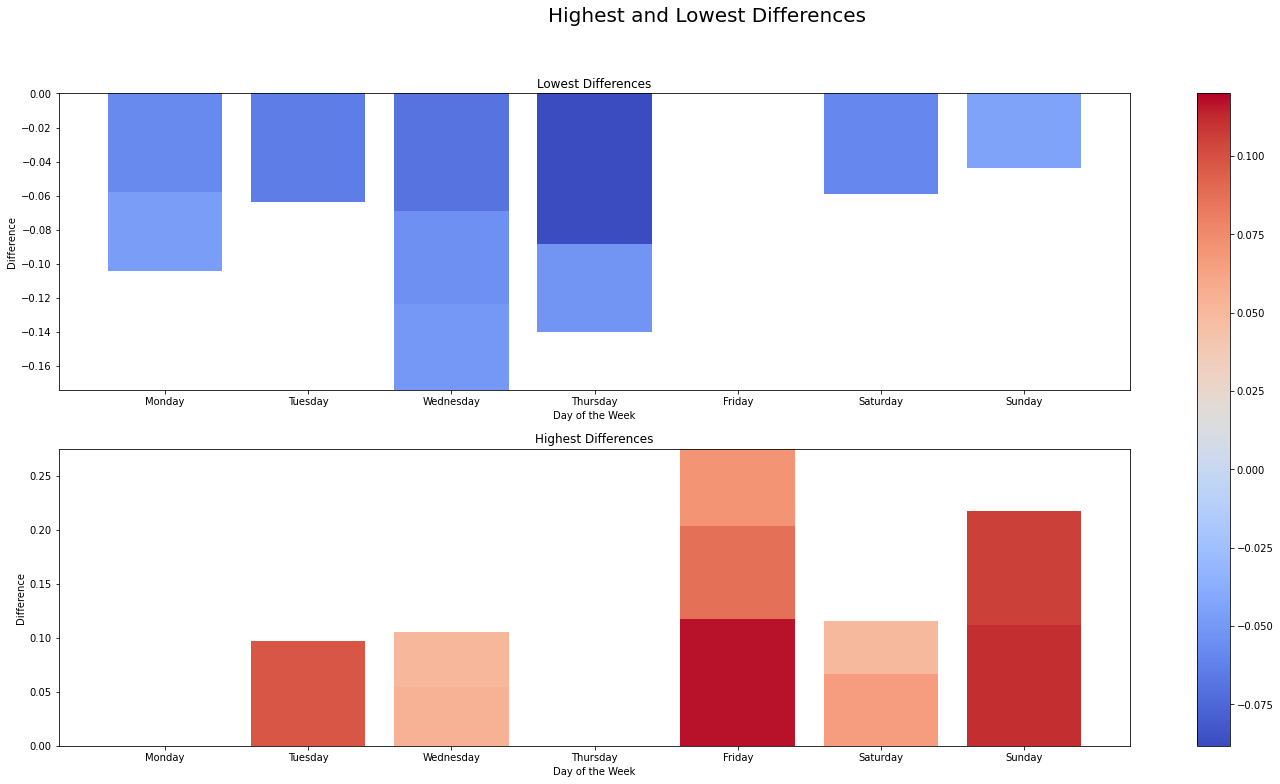

In [169]:
fig = top_k_dates(new_data,10,0.12,-0.0882)
fig.savefig('../Images/top_10_dates_2023.png')

Stackplot of Range and Difference

In [97]:

def high_time_color_map_plot(df):
    # We show the high time of the MANA token with respect to the dates as x axis using a color map the color indicates how high the price was at that time
    fig, axs = plt.subplots(figsize=(24,6))
    fig.suptitle('High Time Heat Map', fontsize=20)
    # prepare the color map
    cmap = plt.cm.coolwarm
    # plot the color map
    # convert the time to HHMMSS format and normalize between 0 and 24
    # normalize will be the same ase the min and max values of high
    norm = plt.Normalize(vmin=df['high'].min(), vmax=df['high'].max())
    timer = df['timeHigh'].apply(lambda x: float(x.strftime('%H%M%S'))/10000)
    axs.scatter(df['Date'], timer, c=df['high'], cmap=cmap)
    axs.set(xlabel='Date', ylabel='High Time')
    plt.tight_layout()
    plt.colorbar(mappable=plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)
    plt.show()
    plt.show()
    return fig


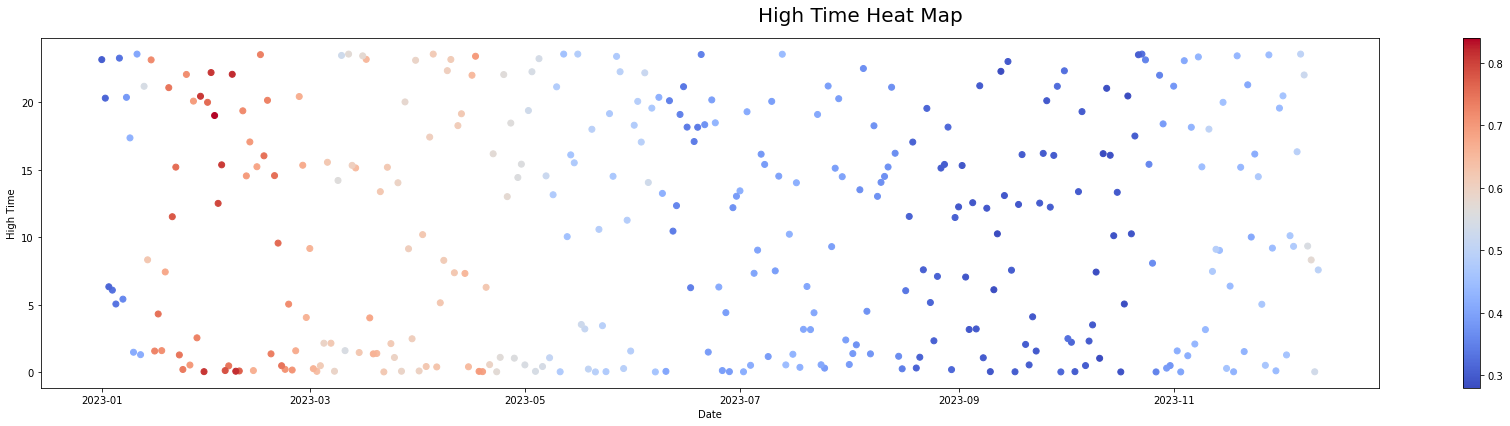

In [98]:
fig = high_time_color_map_plot(new_data)
fig.savefig('../Images/high_time_color_map_plot.png')

change for low

In [99]:
def low_time_color_map_plot(df):
    # We show the low time of the MANA token with respect to the dates as x axis using a color map the color indicates how low the price was at that time
    fig, axs = plt.subplots(figsize=(24,6))
    fig.suptitle('Low Time Color Map', fontsize=20)
    # prepare the color map
    cmap = plt.cm.coolwarm
    # The norm will be same as the low price variation
    norm = plt.Normalize(vmin=df['low'].min(), vmax=df['low'].max())
    # plot the color map
    # convert the time to HHMMSS format and normalize between 0 and 24
    timer = df['timeLow'].apply(lambda x: float(x.strftime('%H%M%S'))/10000)
    axs.scatter(df['Date'], timer, c=df['low'], cmap=cmap, norm=norm)
    axs.set(xlabel='Date', ylabel='Low Time')
    # show the colorbar
    plt.tight_layout()
    plt.colorbar(mappable=plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs)
    plt.show()
    return fig

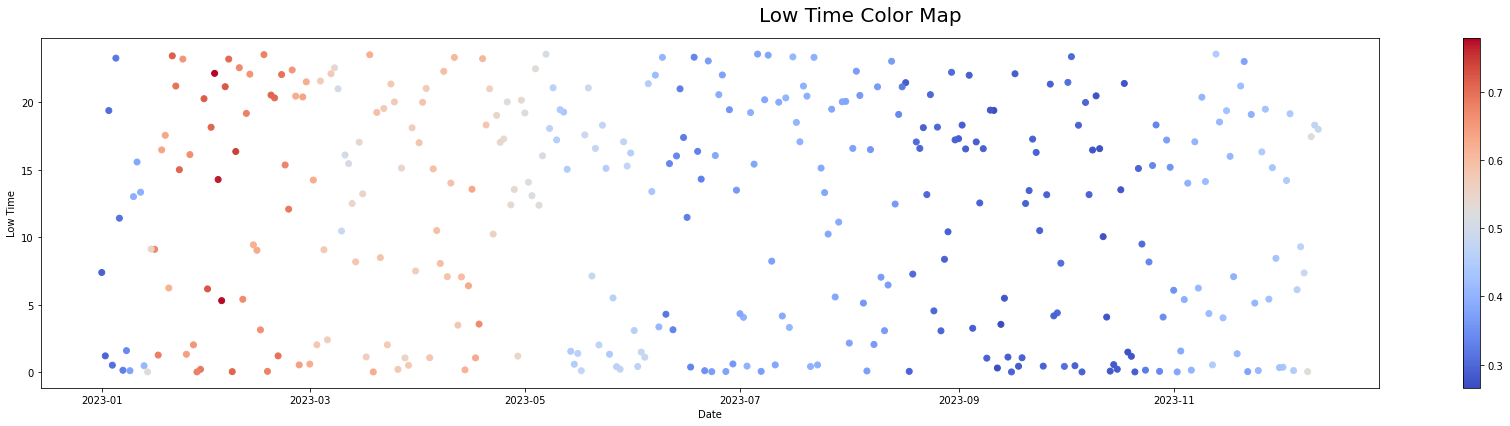

In [100]:
fig = low_time_color_map_plot(new_data)
fig.savefig('../Images/low_time_color_map_plot.png')

In [101]:
def high_and_low_together_plot(df):
    fig, axs = plt.subplots(figsize=(24,6))
    fig.suptitle('Daily Extreme Value Analysis for 2023', fontsize=20)
    # # convert the time to HHMMSS format and normalize between 0 and 24
    # make scatter dots size correspond to the low or high value
    timer = df['timeLow'].apply(lambda x: float(x.strftime('%H%M%S'))/10000)
    axs.scatter(df['Date'], timer, label='Low Time', s=(2/df['low'])**2)
    timer = df['timeHigh'].apply(lambda x: float(x.strftime('%H%M%S'))/10000)
    axs.scatter(df['Date'], timer, label='High Time', s=(10*df['high'])**2)
    axs.set(xlabel='Date', ylabel='Time')
    axs.legend()
    # create coloured contour plot contourf for the high and low values together
    # prepare the color map
    # convert the time to HHMMSS format and normalize between 0 and 24
    plt.show()
    return fig

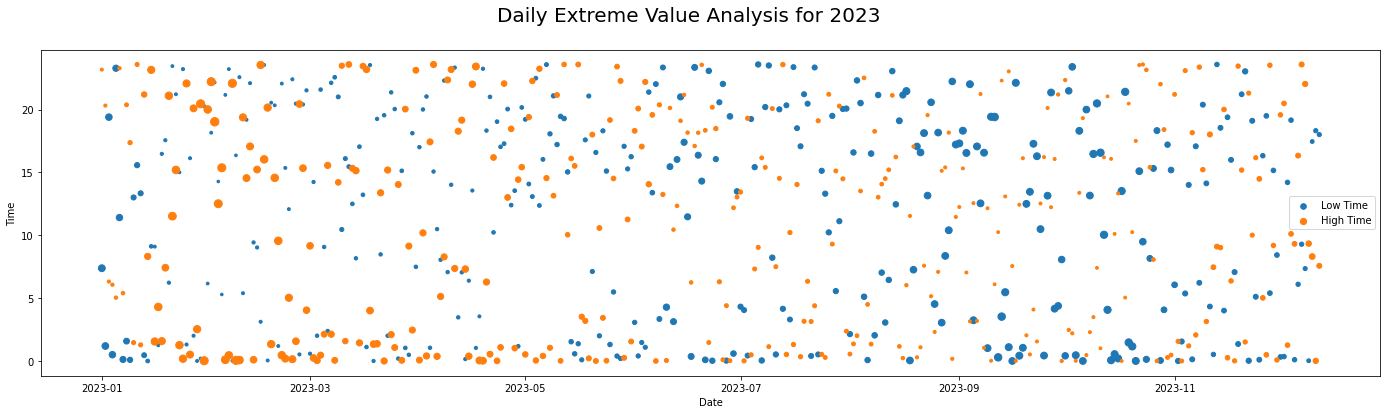

In [102]:
fig = high_and_low_together_plot(new_data)
fig.savefig('../Images/Daily_Extreme_Value.png')

In [ ]:
# calculating distribution of closing ratio through the year of 2023
def get_closing_Ratio(df):
    